In [3]:
import hana_ml

In [4]:
print(hana_ml.__version__)

2.6.20120900


In [8]:
from notebook_hana_connector.notebook_hana_connector import NotebookConnectionContext
from hana_ml import dataframe
from hana_ml.dataframe import ConnectionContext

In [9]:
conn = NotebookConnectionContext(connectionId = 'HANA_ML')

In [10]:
conn.connection.isconnected()

True

In [11]:
import pandas as pd

In [12]:
df_train=pd.read_csv('iris_train_data_tbl.csv')

In [13]:
df_train

,ID,SEPALLENGTHCM,SEPALWIDTHCM,PETALLENGTHCM,PETALWIDTHCM,SPECIES
0,1,4.9,3.0,1.4,0.2,Iris-setosa
1,2,4.6,3.1,1.5,0.2,Iris-setosa
2,3,5.0,3.6,1.4,0.2,Iris-setosa
3,4,5.4,3.9,1.7,0.4,Iris-setosa
4,5,4.4,2.9,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
100,101,6.8,3.2,5.9,2.3,Iris-virginica
101,102,6.7,3.3,5.7,2.5,Iris-virginica
102,103,6.7,3.0,5.2,2.3,Iris-virginica
103,104,6.5,3.0,5.2,2.0,Iris-virginica


In [14]:
dataframe.create_dataframe_from_pandas(conn, df_train, 'IRIS_TRAIN_TBL_00', 'HANAML', force=True, replace=True)

100%|██████████| 1/1 [00:00<00:00, 13.09it/s]


In [15]:
hdf_train = conn.table('IRIS_TRAIN_TBL_00')

In [16]:
hdf_train.head(5).collect()

,ID,SEPALLENGTHCM,SEPALWIDTHCM,PETALLENGTHCM,PETALWIDTHCM,SPECIES
0,1,4.9,3.0,1.4,0.2,Iris-setosa
1,2,4.6,3.1,1.5,0.2,Iris-setosa
2,3,5.0,3.6,1.4,0.2,Iris-setosa
3,4,5.4,3.9,1.7,0.4,Iris-setosa
4,5,4.4,2.9,1.4,0.2,Iris-setosa


In [17]:
hdf_train.count()

105

In [18]:
from hana_ml.visualizers.eda import EDAVisualizer
import matplotlib.pyplot as plt
import time
import numpy as np
from hana_ml.algorithms.pal import stats

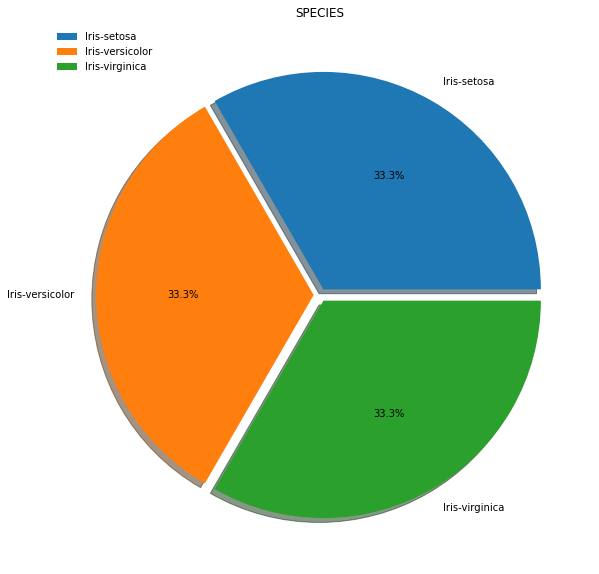

Time: 1s


In [19]:
f = plt.figure(figsize=(10,10))
ax1 = f.add_subplot(111)
start = time.time()
eda = EDAVisualizer(ax1)
ax, pie_data = eda.pie_plot(data = hdf_train, column = "SPECIES", title = "SPECIES", legend = True)
plt.show()
end=time.time()
print("Time: {}s".format(round(end-start),2))

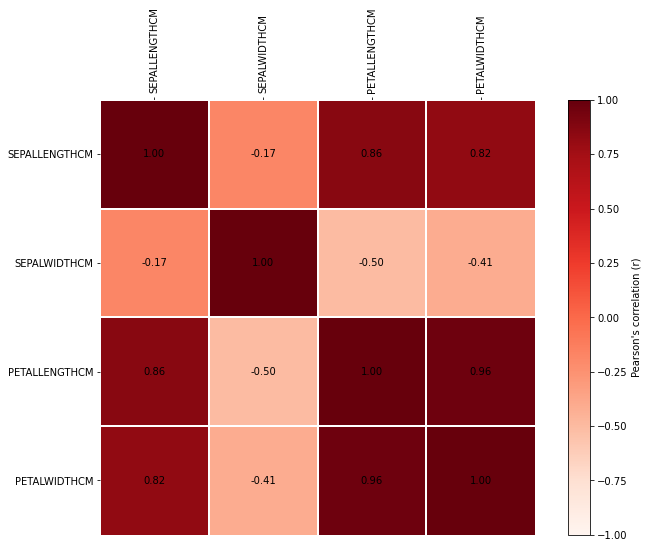

In [20]:
f = plt.figure(figsize=(12,8))
ax1 = f.add_subplot(111)
eda = EDAVisualizer(ax1)
ax, corr_data = eda.correlation_plot(data = hdf_train, corr_cols = ["SEPALLENGTHCM", "SEPALWIDTHCM", "PETALLENGTHCM", "PETALWIDTHCM"], 
                                     label=True, cmap="Reds")
plt.show()

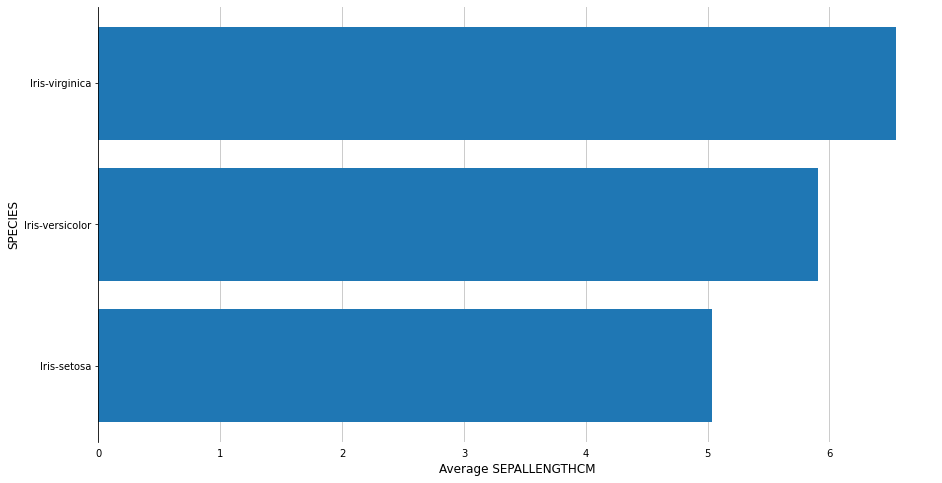

In [21]:
f = plt.figure(figsize=(15,8))
ax1 = f.add_subplot(111)
eda = EDAVisualizer(ax1)
ax, bar_data = eda.bar_plot(data = hdf_train, column='SPECIES', aggregation={'SEPALLENGTHCM': 'avg'})
plt.show()

In [22]:
from hana_ml.algorithms.pal import trees

In [23]:
rfc = trees.RandomForestClassifier(n_estimators=3,
                                   max_features=3,
                                   random_state=2,
                                   split_threshold=0.00001,
                                   calculate_oob=True,
                                   min_samples_leaf=1, thread_ratio=0.5)

In [24]:
features = ['SEPALLENGTHCM','SEPALWIDTHCM','PETALLENGTHCM','PETALWIDTHCM']
label = 'SPECIES'

In [25]:
rfc.fit(hdf_train, 'ID', features, label)

In [26]:
df_test=pd.read_csv('iris_test_data_tbl.csv')

In [27]:
dataframe.create_dataframe_from_pandas(conn, df_test, 'IRIS_TEST_TBL_00', 'HANAML', force=True, replace=True)

100%|██████████| 1/1 [00:00<00:00, 13.49it/s]


In [28]:
hdf_test = conn.table('IRIS_TEST_TBL_00')

In [29]:
hdf_test.count()

45

In [30]:
predict_df = rfc.predict(hdf_test, 'ID', features, verbose=False)

In [31]:
predict_df.collect()

,ID,SCORE,CONFIDENCE
0,1,Iris-setosa,1.0
1,2,Iris-setosa,1.0
2,3,Iris-setosa,1.0
3,4,Iris-setosa,1.0
4,5,Iris-setosa,1.0
5,6,Iris-setosa,1.0
6,7,Iris-setosa,1.0
7,8,Iris-setosa,1.0
8,9,Iris-setosa,1.0
9,10,Iris-setosa,1.0


In [32]:
rfc.score(hdf_test, 'ID', features, label)

0.955555